In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
df = df[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


In [4]:
data = np.cov(df.values.T)
# The transpose is required to ensure the covariance matrix is 
#based on features, not samples data
data

array([[8.46635078, 1.22470367],
       [1.22470367, 0.19630525]])

In [5]:
eigenvectors, eigenvalues, _ = np.linalg.svd(data, full_matrices=False)

In [6]:
eigenvalues

array([8.64390408, 0.01875194])

In [7]:
eigenvectors

array([[-0.98965371, -0.14347657],
       [-0.14347657,  0.98965371]])

In [8]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.99783531, 1.        ])

In [9]:
P = eigenvectors[0]
P

array([-0.98965371, -0.14347657])

In [10]:
x_t_p = P.dot(df.values.T)
x_t_p

array([-15.92897116, -15.52291615, -14.90128612, -14.46067667,
       -16.78480139, -15.00398523, -15.33617323, -14.74165693,
       -17.32640496, -17.11412321, -15.92194081, -14.66506721,
       -14.52665917, -14.42353632, -14.3843806 , -15.20679083,
       -14.57971203, -16.32066179, -15.29470516, -13.33820381,
       -14.82528704, -14.75600459, -16.52175236, -12.68660391,
       -15.68528813, -16.85939248, -13.65934747, -13.38224443,
       -14.75901759, -14.10225923, -13.8063641 , -16.15573066,
       -14.7644764 , -14.59708943, -15.71382658, -16.77232562,
       -16.86828468, -17.74004081, -15.45837846, -14.9065981 ,
       -14.167224  , -14.12806828, -13.76102551, -16.18284438,
       -15.75412342, -14.42855131, -16.01904099, -15.63407368,
       -15.43255602, -15.52091417, -15.08201975, -16.43082168,
       -15.16005093, -14.97143278, -15.19347093, -15.69259874,
       -15.08344448, -15.53811128, -16.03323847, -12.72490211,
       -12.02037609, -11.81713337, -12.96040699, -13.85

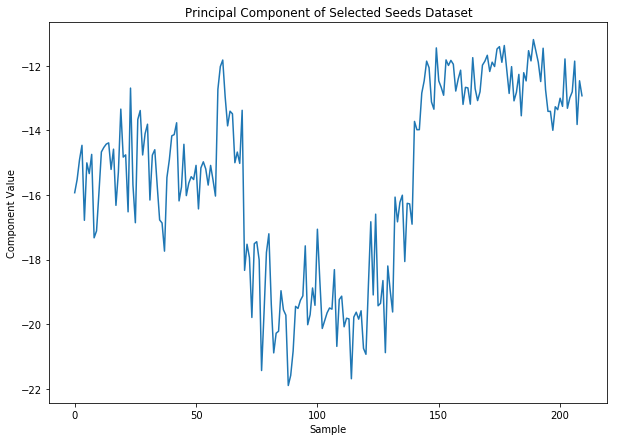

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(x_t_p)
plt.title('Principal Component of Selected Seeds Dataset')
plt.xlabel('Sample')
plt.ylabel('Component Value')
plt.show()

In [12]:
# Unit Test

In [13]:
import unittest
class TestEigenvectors(unittest.TestCase):   
    
    def test_df_head(self):
        self.assertEqual(len(df.head()),5)   
        
    def test_data_size(self):
        self.assertEqual(data.size,4) 
        
    def test_eigenvalues(self):
        self.assertEqual(len(eigenvalues),2)
        
    def test_p(self):
        self.assertEqual(len(P),2)
        
    def test_x_t_p(self):
        self.assertEqual(x_t_p.size,210)

In [14]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestEigenvectors)
unittest.TextTestRunner(verbosity=2).run(suite)

test_data_size (__main__.TestEigenvectors) ... ok
test_df_head (__main__.TestEigenvectors) ... ok
test_eigenvalues (__main__.TestEigenvectors) ... ok
test_p (__main__.TestEigenvectors) ... ok
test_x_t_p (__main__.TestEigenvectors) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.008s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>